Load the data

In [46]:
import pandas as pd

data = pd.read_csv('../data/heart_2020_cleaned.csv')

Normalize variables

In [47]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = data.select_dtypes(include=['float64']).columns
scaler = MinMaxScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])


Separate between objective and independent variables

In [48]:
char = data.drop(columns=['HeartDisease'])
obj = data['HeartDisease']


Divide the data between train and test data

In [49]:
from sklearn.model_selection import train_test_split

char_train, char_test, obj_train, obj_test = train_test_split(char, obj, test_size=0.2, random_state=42)


Create a Random Forest model

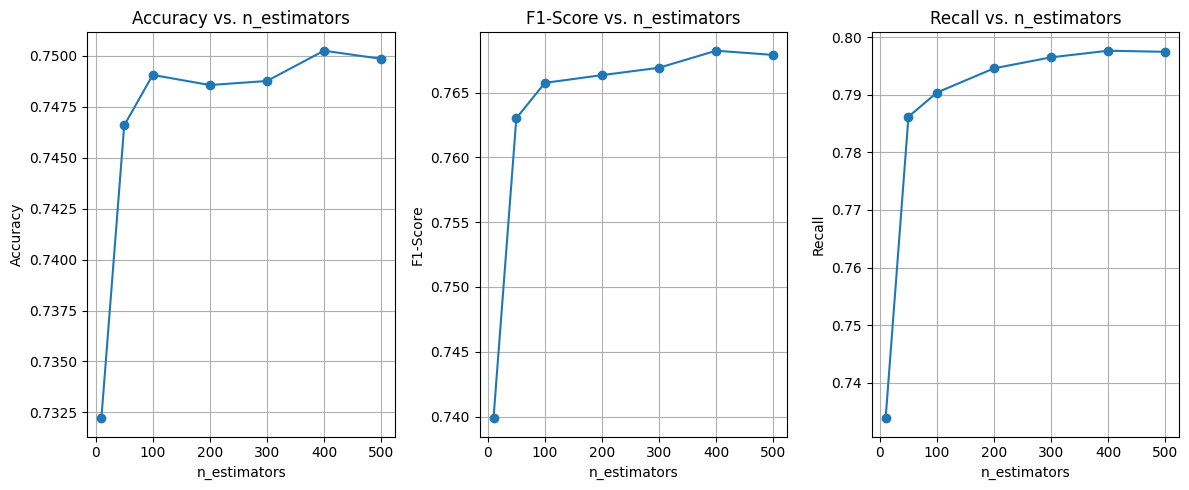

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt

n_estimators_values = [10, 50, 100, 200, 300, 400, 500]

# Initialize lists to store performance metrics
accuracy_scores = []
f1_scores = []
recall_scores = []

# Train Random Forest models with different n_estimators values
for n_estimators in n_estimators_values:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model.fit(char_train, obj_train)
    predictions = rf_model.predict(char_test)
    
    accuracy = accuracy_score(obj_test, predictions)
    f1 = f1_score(obj_test, predictions)
    recall = recall_score(obj_test, predictions)
    
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)

# Create a plot to visualize the performance metrics
plt.figure(figsize=(12, 5))

# Plot accuracy scores
plt.subplot(1, 3, 1)
plt.plot(n_estimators_values, accuracy_scores, marker='o')
plt.title('Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.grid()

# Plot F1 scores
plt.subplot(1, 3, 2)
plt.plot(n_estimators_values, f1_scores, marker='o')
plt.title('F1-Score vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('F1-Score')
plt.grid()

# Plot recall scores
plt.subplot(1, 3, 3)
plt.plot(n_estimators_values, recall_scores, marker='o')
plt.title('Recall vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Recall')
plt.grid()

plt.tight_layout()
plt.show()